In [2]:
%pip install -q -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [1]:
%load_ext autoreload
%autoreload 2

## build dataset

### normal dataset

In [3]:
import dataset

In [ ]:
df_dataset = dataset.build_normal_dataframe(numpy_output_file='fulldata.npy', dataframe_output_file='df_cohort')

### autoencoded dataset

In [24]:
import dataset
from hyper_params import HyperParams
params = HyperParams()
params.encoder_training_epochs = 10   # uncomment if you want a short demo training
np_dataset = dataset.build_autoencoded_data_matrix(numpy_output_file='autoencoded_fulldata.npy', params=params)

Writing AutoEncoder training data to data/autoencoder_training_data.npy
autoencoder training data (with y=0) was saved to data/autoencoder_training_data.npy
dataset length = 54871 num features = 1440
Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=1440, out_features=720, bias=True)
    (1): ReLU()
    (2): Linear(in_features=720, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=128, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=720, bias=True)
    (3): ReLU()
    (4): Linear(in_features=720, out_features=1440, bias=True)
    (5): Sigmoid()
  )
)
Will now train AutoEncoder with max 10 epochs


KeyboardInterrupt: 

## baseline model: train and evaluate

In [ ]:
import baseline_model as bm
from dataproc import io
df_dataset = np.load('data/fulldata.npy')
df_dataset = io.load_dataframe('df_cohort')
X_train, X_test, y_train, y_test = bm.split_dataset(df_dataset, test_size=params.test_set_fraction, random_state=42)
X_train, y_train = bm.oversample_minority_class(X_train, y_train)
model = bm.random_forest_model(X_train, y_train)
y_pred = model(X_test)
bm.model_performance(model, y_test, y_pred)

## MLP: train and evaluate

### normal dataset

100%|██████████| 1/1 [00:00<00:00,  5.35it/s]

(2, 843, 1, False)


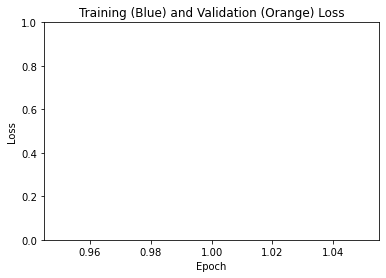

/home/ec2-user/anaconda3/envs/amazonei_pytorch_latest_p36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ec2-user/anaconda3/envs/amazonei_pytorch_latest_p36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ec2-user/anaconda3/envs/amazonei_pytorch_latest_p36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       380
           1     0.4062    1.0000    0.5778       260

    accuracy                         0.4062       640
   macro avg     0.2031    0.5000    0.2889       640
weighted avg     0.1650    0.4062    0.2347       640


TN: 0 FP: 380 FN: 0 TP: 260

No Skill: ROC AUC=0.500
MLP: ROC AUC=0.500


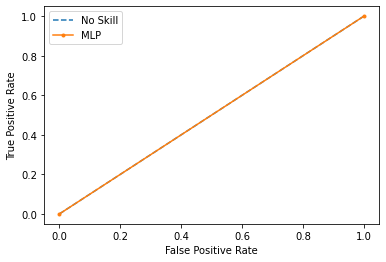


MLP: f1=0.578 auc=0.703


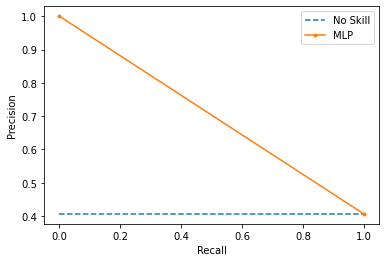

In [79]:
import MLP
import numpy as np

# Load data
df_dataset = np.load('data/fulldata.npy')

# Train Model
MLPmodel = MLP.binary(dataset=df_dataset, n_epochs=1, nodes=[676, 338], batch_size = 128, upper_y_lim = 1, p = 0.5)

### autoencoded dataset

100%|██████████| 100/100 [00:09<00:00, 10.53it/s]


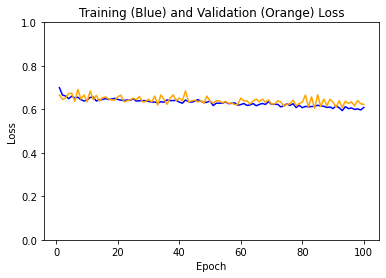

/home/ec2-user/anaconda3/envs/amazonei_pytorch_latest_p36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ec2-user/anaconda3/envs/amazonei_pytorch_latest_p36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ec2-user/anaconda3/envs/amazonei_pytorch_latest_p36/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000      1206
           1     0.3712    1.0000    0.5414       712

    accuracy                         0.3712      1918
   macro avg     0.1856    0.5000    0.2707      1918
weighted avg     0.1378    0.3712    0.2010      1918


TN: 0 FP: 1206 FN: 0 TP: 712

No Skill: ROC AUC=0.500
MLP: ROC AUC=0.690


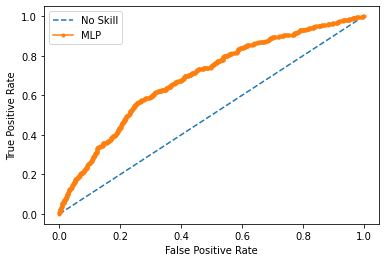


MLP: f1=0.541 auc=0.557


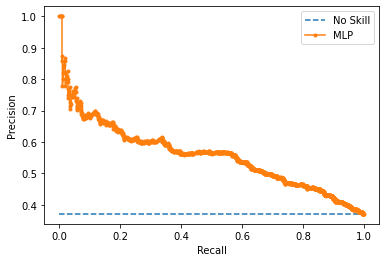

In [22]:
import MLP
import numpy as np

# Load data
df_dataset = np.load('data/autoencoded_fulldata.npy')

# Train Model
MLPmodel = MLP.binary(dataset=df_dataset, n_epochs=100, nodes=[64, 12], # [676, 338],
                      batch_size = 256, upper_y_lim = 1, p = 0.05)